# Análise exploratória de dados

* Etapa inicial do projeto destinada a conhecer melhor os dados utilizados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

## Dataset
* O dataset selecionado foi o The Movies Dataset, disponível em: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv
* O dataset foi escolhido por possuir as features desejadas para realizar as análises e propor recomendações baseado em escolhas do usuário.

In [2]:
dataset = pd.read_csv("datasets/movies_metadata.csv")
dataset.head()

/tmp/ipykernel_22374/4166922251.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("datasets/movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
### Identificar as colunas e quais podem ser usadas
dataset.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### Colunas textuais

In [4]:
text_summary = []
for column, dtype_ in dataset.dtypes.items():
    if str(dtype_) in ['object', 'string']:
        n_unique = len(dataset[column].unique())
        n_na = dataset[column].isna().sum()
        most_present = dataset[column].value_counts(dropna=True).sort_values().keys()[-1]
        text_summary.append({
            "column": column, "n_unique": n_unique, "n_NaN": n_na, "most_present": most_present
        })

pd.DataFrame(text_summary)

,column,n_unique,n_NaN,most_present
0,adult,5,0,False
1,belongs_to_collection,1699,40972,"{'id': 415931, 'name': 'The Bowery Boys', 'pos..."
2,budget,1226,0,0
3,genres,4069,0,"[{'id': 18, 'name': 'Drama'}]"
4,homepage,7674,37684,http://www.georgecarlin.com
5,id,45436,0,141971
6,imdb_id,45418,17,tt1180333
7,original_language,93,11,en
8,original_title,43373,0,Hamlet
9,overview,44308,954,No overview found.


* JSONs salvos como texto
* belongs_to_collection é NaN quando não pertence a coleção
* retirar colunas homepage, status, tagline, video por possuírem muitos valores nulos ou não serem relevantes

### Verificar distribuições das colunas numéricas

In [5]:
dataset.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


O tempo de duração não está presente em todos os filmes

<Axes: >

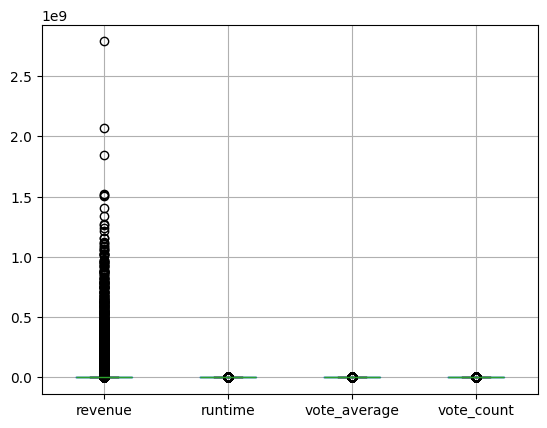

In [6]:
### Distribuições numéricas em boxplot
copy_df = dataset.copy()
copy_df.boxplot()

Revenue apresenta muita variação, é plausível

In [7]:
### Distribuições numéricas exceto Revenue em boxplot
copy_df = dataset.copy()
dataset_without_rev = copy_df.drop(columns=["revenue"])
dataset_without_rev.boxplot()

<Axes: >

A contagem de votos possui muita variação e não será utilizada

In [8]:
### Distribuições numéricas exceto Revenue em boxplot
copy_df = dataset.copy()
copy_df[["runtime"]].boxplot()

<Axes: >

É uma coluna importante, porém possui muita variação e deve ser tratada

## Limpeza inicial e adequação de dados
O intuito dessa etapa é preparar as colunas do dataset e padronizá-las

In [9]:
### Excluindo colunas que não serão usadas
dataset.drop(columns=['homepage', 'status', 'tagline', 'video', 'vote_count'], inplace=True)

In [10]:
### Colunas em formato de json com NaN serão convertidos para listas vazias
columns = [
    "production_companies",
    "production_countries",
    "spoken_languages",
    "belongs_to_collection"
]

for col in columns:
    dataset[col].replace(np.nan, "[]", inplace=True)

#### Função auxiliar para extrair os valores desejados das colunas com strings json

In [11]:
def list_separator(data: pd.DataFrame, column: str, key_to_keep: str) -> pd.DataFrame:
    values = data.loc[:, column]
    values_list = [
        list_.strip('][').split("}, {") if list_ != "[]" else "[]" for list_ in values
    ]
    values_keys = [
        [
            name.split(f"{key_to_keep}\': \'")[-1].split("\'")[0].lower().replace(" ", "_") for name in row
        ] if row != "[]" else "[]" for row in values_list
    ] 

    data[column] = values_keys
    return data

In [12]:
dataset = list_separator(dataset, "genres", "name")
dataset = list_separator(dataset, "production_companies", "name")
dataset = list_separator(dataset, "production_countries", "iso_3166_1")
dataset = list_separator(dataset, "spoken_languages", "iso_639_1")

#### Função auxiliar para extrair o nome da coleção

In [14]:
def get_collection_name(data: pd.DataFrame, column: str) -> pd.DataFrame:
    values = data.loc[:, column]
    collection_name = [
        name.split(f"name\': \'")[-1].split("\'")[0].lower() if name != "[]" else "[]" for name in values
    ]

    data[column] = collection_name
    return data

dataset = get_collection_name(dataset, "belongs_to_collection")

## Salvando dados após primeiro processamento

In [16]:
dataset.rename(columns={"id": "tmdb_id"}, inplace=True)

dataset.to_csv("datasets/movies_metadata_EDA.csv", index=False)